In [107]:
import pandas as pd
import numpy as np
from datetime import date
import time
import gcld3
import warnings 
import emoji
import re
import nltk
import matplotlib as plt
import seaborn as sns
from pprint import pprint
from nltk.corpus import stopwords
from scripts.scripts import *
warnings.filterwarnings("ignore") 

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
%matplotlib inline

In [2]:
df1 = pd.read_json('/Volumes/ML_projects/Phase4data/Iphone12.json', lines=True)
df2 = pd.read_csv('/Volumes/ML_projects/Phase4data/apple_silicon_SEARCH.csv')
df3 = pd.read_csv('/Volumes/ML_projects/Phase4data/M1_MacBook_SEARCH.csv')
df4 = pd.read_csv('/Volumes/ML_projects/Phase4data/new_macbook_SEARCH.csv')
df5 = pd.read_csv('/Volumes/ML_projects/Phase4data/Iphone_12_Pro_SEARCH.csv', error_bad_lines=False, engine="python")
df6 = pd.read_csv('/Volumes/ML_projects/Phase4data/new_Apple_SEARCH.csv', error_bad_lines=False, engine="python")
df7 = pd.read_csv('/Volumes/ML_projects/Phase4data/new_iphone_SEARCH.csv', error_bad_lines=False, engine="python")
df8 = pd.read_csv('/Volumes/ML_projects/Phase4data/Silicon_SEARCH.csv', error_bad_lines=False, engine="python")

Skipping line 129970: ',' expected after '"'
Skipping line 235431: ',' expected after '"'
Skipping line 269778: ',' expected after '"'
Skipping line 276452: ',' expected after '"'
Skipping line 201421: ',' expected after '"'
Skipping line 74247: ',' expected after '"'
Skipping line 197383: ',' expected after '"'
Skipping line 222434: ',' expected after '"'
Skipping line 234201: ',' expected after '"'
Skipping line 256441: ',' expected after '"'
Skipping line 137005: ',' expected after '"'
Skipping line 157999: ',' expected after '"'
Skipping line 158000: ',' expected after '"'
Skipping line 185665: ',' expected after '"'


Add search terms to each dataframe before concatinating. 

In [3]:
df1['search_term'] = 'iphone 12'
df2['search_term'] = 'apple silicon'
df3['search_term'] = 'M1 macbook'
df4['search_term'] = 'new macbook'
df5['search_term'] = 'iphone 12 pro'
df6['search_term'] = 'new apple'
df7['search_term'] = 'new iphone'
df8['search_term'] = 'silicon'

In [4]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8]

In [5]:
main = pd.concat(frames, ignore_index=True)

In [6]:
main.shape

(2425258, 37)

# Remove Foreign Language Tweets

In [7]:
main = main.loc[main['language'] == 'en']

In [8]:
main.shape

(1582752, 37)

# Convert Emojis to text

In [9]:
# new cleaned tweet column
main['c_tweet'] = 'cleaned'

In [11]:
main['c_tweet'] = main.tweet.apply(emoji.demojize)

# Remove numbers

In [50]:
main['c_tweet'] = main.c_tweet.apply(cleaner_text)

# Remove special Characters

In [51]:
main['c_tweet'] = main.c_tweet.apply(clean_hash)

##### Drop Duplicate Tweets

In [52]:
# If tweet is repeated multiple times only keep last occurance.
main = main.drop_duplicates(subset='c_tweet', keep='last')
main.shape

(985657, 38)

# Create Stopwords

In [55]:
stop_words=list(set(stopwords.words("english")))

In [56]:
stop_words.extend(["ll", "please retweet", "help rt", "visit us",
                   "please subscribe", "for sale", "enter here", 
                   "to win", "from iphone", "huge giveaway", "new arrival", 
                   "win an", "unlocked now", "new available", "giveaway", 
                   "subscribe", "retweet", "easter egg"])

In [57]:
eda_stopwords = ["iphone", "iphone pro", "pro max", "youtube", "youtuber", "youtubers", 
                 "also", "asap", "hmmm","hello", "haha", "dont", "imac", "ipad", 
                 "ipadair", "ipads", "iphonecase", "iphonemini", "iphonepro", "iphonepromax", 
                 "iphones", "iphoneth", "ipod",  "lmao", "lmfao", "macbook", "macbookair",
                 "macbookpro", "macbooks", "macosbigsur", "macmini", "magsafe", 
                 "okay", "promax", "wahala", "wont", 'yall','yeah', 'apple', 'skin', 'tone', "man", "pro", "face", "loudly",]

stop_words.extend(eda_stopwords)

In [58]:
len(stop_words)

242

# Tokenize/Lemmatize

In [67]:
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = nltk.tokenize.TweetTokenizer()

In [68]:
def lemmatize_text(text):
     return [lemmatizer.lemmatize(word.replace(" ", "")) for word in tokenizer.tokenize(text)]

In [69]:
main['tokenized'] = main.c_tweet.apply(lemmatize_text)

In [70]:
#Remove stop words, and words with only 2 chars. 
main['filtered'] = main['tokenized'].apply(lambda x: [item for item in x if item not in stop_words and len(item)>2])

In [71]:
main['delisted'] = main.filtered.apply(unlist)
main.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,search_term,c_tweet,tokenized,filtered,delisted
5,1333818145094643713,1333818145094643712,2020-12-01 12:00:01 EST,2020-12-01 00:00:00,12:00:01,-500,1600309820,coolmuster,Coolmuster,,#iPhone12 #Android iPhone 12 vs Android’s best...,en,[],[https://bit.ly/37hILmw],[https://pbs.twimg.com/media/EoKezKZUYAQr6_2.jpg],0,0,0,"[iphone12, android]",[],https://twitter.com/coolmuster/status/13338181...,False,,1,https://pbs.twimg.com/media/EoKezKZUYAQr6_2.jpg,,,,,,,[],,,,,iphone 12,iphone android iphone vs android best it time ...,"[iphone, android, iphone, v, android, best, it...","[android, android, best, time, consider, switc...","android, android, best, time, consider, switch..."
6,1333818137251287040,1333813308747620352,2020-12-01 11:59:59 EST,2020-12-01 00:00:00,11:59:59,-500,1257039074696867840,nanaakuamensah4,Nana_Akua🇬🇭❤️🌟🌟🌟🌟🌟,,@cuppymusic I'm asking DJ cuppy Please I want ...,en,[],[],[],0,0,0,[],[],https://twitter.com/NanaAkuamensah4/status/133...,False,,0,,,,,,,,"[{'screen_name': 'cuppymusic', 'name': 'Cuppy ...",,,,,iphone 12,asking dj cuppy please want an iphone,"[asking, dj, cuppy, please, want, an, iphone]","[asking, cuppy, please, want]","asking, cuppy, please, want"
15,1333818003423698949,1333818003423698944,2020-12-01 11:59:27 EST,2020-12-01 00:00:00,11:59:27,-500,1901298962,naija_pr,Naija,,The moment Mercy Eke sprays her friend $3000 c...,en,[],[],[],0,1,3,[],[],https://twitter.com/Naija_PR/status/1333818003...,False,,1,https://pbs.twimg.com/ext_tw_video_thumb/13338...,,,,,,,[],,,,,iphone 12,the moment mercy eke sprays her friend cash an...,"[the, moment, mercy, eke, spray, her, friend, ...","[moment, mercy, eke, spray, friend, cash, gave...","moment, mercy, eke, spray, friend, cash, gave,..."
22,1333817867377192960,1333353705731743744,2020-12-01 11:58:55 EST,2020-12-01 00:00:00,11:58:55,-500,302785756,holliebear80,Kate,,@CraigStrife Aww back at you Mr S 😘 &amp; Appl...,en,[],[],[],0,0,0,[],[],https://twitter.com/Holliebear80/status/133381...,False,,0,,,,,,,,"[{'screen_name': 'CraigStrife', 'name': 'Craig...",,,,,iphone 12,aww back at you mr amp apple still the iphone ...,"[aww, back, at, you, mr, amp, apple, still, th...","[aww, back, amp, still, still, arrived, guessi...","aww, back, amp, still, still, arrived, guessin..."
24,1333817819767721991,1333817819767721984,2020-12-01 11:58:44 EST,2020-12-01 00:00:00,11:58:44,-500,1326625568092278789,justabussy,Dickiana😏(H0rny era),,@PicsArtStudio umm I can’t press on the search...,en,[],[],[https://pbs.twimg.com/media/EoKsPOkWEAE7S6m.jpg],1,0,1,[],[],https://twitter.com/JustABussy/status/13338178...,False,,1,https://pbs.twimg.com/media/EoKsPOkWEAE7S6m.jpg,,,,,,,[],,,,,iphone 12,umm can press on the search bar on the iphone ...,"[umm, can, press, on, the, search, bar, on, th...","[umm, press, search, bar, hurry, fix]","umm, press, search, bar, hurry, fix"


# Drop unneccessary columns

In [108]:
main.columns.to_list()

['index',
 'date',
 'time',
 'timezone',
 'user_id',
 'username',
 'name',
 'place',
 'tweet',
 'replies_count',
 'retweets_count',
 'likes_count',
 'search_term',
 'c_tweet',
 'tokenized',
 'filtered',
 'delisted',
 'sentiment']


In [73]:
main.drop(columns = ['created_at', 'hashtags', 'cashtags', 'link',
                     'retweet', 'quote_url', 'video', 'thumbnail',
                     'near', 'geo', 'source', 'user_rt_id', 'user_rt',
                     'retweet_id', 'reply_to', 'retweet_date','translate',
                     'trans_src', 'trans_dest', 'language', 'mentions',
                     'urls', 'photos', 'id', 'timezone', 'user_id', 'place',
                     'conversation_id', 'created_at'], inplace=True)

In [74]:
main.head(5)

,date,time,timezone,user_id,username,name,place,tweet,replies_count,retweets_count,likes_count,search_term,c_tweet,tokenized,filtered,delisted
5,2020-12-01 00:00:00,12:00:01,-500,1600309820,coolmuster,Coolmuster,,#iPhone12 #Android iPhone 12 vs Android’s best...,0,0,0,iphone 12,iphone android iphone vs android best it time ...,"[iphone, android, iphone, v, android, best, it...","[android, android, best, time, consider, switc...","android, android, best, time, consider, switch..."
6,2020-12-01 00:00:00,11:59:59,-500,1257039074696867840,nanaakuamensah4,Nana_Akua🇬🇭❤️🌟🌟🌟🌟🌟,,@cuppymusic I'm asking DJ cuppy Please I want ...,0,0,0,iphone 12,asking dj cuppy please want an iphone,"[asking, dj, cuppy, please, want, an, iphone]","[asking, cuppy, please, want]","asking, cuppy, please, want"
15,2020-12-01 00:00:00,11:59:27,-500,1901298962,naija_pr,Naija,,The moment Mercy Eke sprays her friend $3000 c...,0,1,3,iphone 12,the moment mercy eke sprays her friend cash an...,"[the, moment, mercy, eke, spray, her, friend, ...","[moment, mercy, eke, spray, friend, cash, gave...","moment, mercy, eke, spray, friend, cash, gave,..."
22,2020-12-01 00:00:00,11:58:55,-500,302785756,holliebear80,Kate,,@CraigStrife Aww back at you Mr S 😘 &amp; Appl...,0,0,0,iphone 12,aww back at you mr amp apple still the iphone ...,"[aww, back, at, you, mr, amp, apple, still, th...","[aww, back, amp, still, still, arrived, guessi...","aww, back, amp, still, still, arrived, guessin..."
24,2020-12-01 00:00:00,11:58:44,-500,1326625568092278789,justabussy,Dickiana😏(H0rny era),,@PicsArtStudio umm I can’t press on the search...,1,0,1,iphone 12,umm can press on the search bar on the iphone ...,"[umm, can, press, on, the, search, bar, on, th...","[umm, press, search, bar, hurry, fix]","umm, press, search, bar, hurry, fix"


In [76]:
main.search_term.value_counts()

new apple        247659
new iphone       220474
iphone 12        218921
silicon          167289
iphone 12 pro     93934
new macbook       25673
M1 macbook         9290
apple silicon      2417
Name: search_term, dtype: int64

# Use VADER sentiment framework to add tags

In [79]:
main['sentiment'] = main.c_tweet.apply(sentiment_analyzer_scores)

In [80]:
main.sentiment

5          positive
6          positive
15         positive
22         positive
24          neutral
             ...   
2425251    positive
2425252     neutral
2425253    positive
2425255    negative
2425257    negative
Name: sentiment, Length: 985657, dtype: object

In [86]:
main.sentiment.value_counts()

positive    450434
neutral     337431
negative    197792
Name: sentiment, dtype: int64

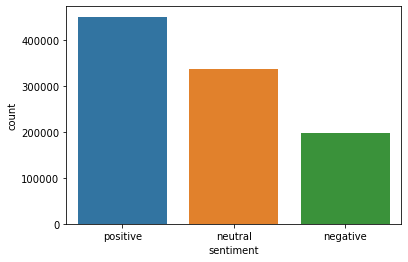

In [90]:
sns.countplot(main.sentiment);

In [102]:
main.date = pd.to_datetime(main['date'])

In [111]:
main['date'].dtype

dtype('<M8[ns]')

In [84]:
main.tail()

,date,time,timezone,user_id,username,name,place,tweet,replies_count,retweets_count,likes_count,search_term,c_tweet,tokenized,filtered,delisted,sentiment
2425251,2020-09-01,00:05:30,-500,895682820365983745,gettinready4god,Sheri,NaN,@Rockprincess818 Our media is nothing but yet ...,0,0,0,silicon,our media is nothing but yet another megaphone...,"[our, medium, is, nothing, but, yet, another, ...","[medium, nothing, yet, another, megaphone, lik...","medium, nothing, yet, another, megaphone, like...",positive
2425252,2020-09-01,00:05:11,-500,350859436,henrynoeljr,Henry Noel Jr,NaN,Silicon Valley Has Deep Pockets for African St...,0,0,1,silicon,silicon valley has deep pockets for african st...,"[silicon, valley, ha, deep, pocket, for, afric...","[silicon, valley, deep, pocket, african, start...","silicon, valley, deep, pocket, african, startu...",neutral
2425253,2020-09-01,00:04:49,-500,205134592,1mtiyazalam,imtiyaz alam,NaN,"@BernieSanders Not going to work, these incite...",0,0,0,silicon,not going to work these incitements are well p...,"[not, going, to, work, these, incitement, are,...","[going, work, incitement, well, planned, well,...","going, work, incitement, well, planned, well, ...",positive
2425255,2020-09-01,00:04:28,-500,1187046067206053888,jacobwohlreport,The Jacob Wohl Report,NaN,Wohl addresses his ban from Instagram/Facebook...,10,2,24,silicon,wohl addresses his ban from instagram facebook...,"[wohl, address, his, ban, from, instagram, fac...","[wohl, address, ban, instagram, facebook, clai...","wohl, address, ban, instagram, facebook, claim...",negative
2425257,2020-09-01,00:00:08,-500,33096395,leiachristina,Leia Herlihy,NaN,Kinda angry at all of Silicon Valley for not s...,1,0,1,silicon,kinda angry at all of silicon valley for not s...,"[kinda, angry, at, all, of, silicon, valley, f...","[kinda, angry, silicon, valley, spending, summ...","kinda, angry, silicon, valley, spending, summe...",negative


In [104]:
main.reset_index(inplace=True)

In [105]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985657 entries, 0 to 985656
Data columns (total 18 columns):
index             985657 non-null int64
date              985657 non-null datetime64[ns]
time              985657 non-null object
timezone          985657 non-null int64
user_id           985657 non-null int64
username          985656 non-null object
name              985634 non-null object
place             221102 non-null object
tweet             985657 non-null object
replies_count     985657 non-null int64
retweets_count    985657 non-null int64
likes_count       985657 non-null int64
search_term       985657 non-null object
c_tweet           985657 non-null object
tokenized         985657 non-null object
filtered          985657 non-null object
delisted          985657 non-null object
sentiment         985657 non-null object
dtypes: datetime64[ns](1), int64(6), object(11)
memory usage: 135.4+ MB
